<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;
                    </span>Изучение данных из файла
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;
                    </span>Анализ данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;
                    </span>Общий вывод
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Рекомендации" data-toc-modified-id="Рекомендации-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;
                    </span>Рекомендации
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Презентация" data-toc-modified-id="Презентация-5">
                    <span class="toc-item-num">5&nbsp;&nbsp;
                    </span>Презентация
                </a>
            </span>
        </li>
    </ul>
</div>

# Исследование рынка заведений общественного питания города Москвы

**Описание проекта**

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

**Цель исследования**

Изучить рынок общественного питания на основе открытых данных, подготовить презентацию для инвесторов.

**Описание данных**  

Таблица `rest_data` (данные о заведениях общественного питания Москвы):
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

## Изучение данных из файла

Импортируем библиотеки, которые пригодятся нам для работы.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Откроем файл с данными `rest_data.csv` и изучим общую информацию:

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')
    
display(data.head())
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Видим, что в столбце `object_name` названия заведений написаны разным регистром. Приведем их к единому виду:

In [3]:
data['object_name'] = data['object_name'].str.lower()
data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В столбце `chain` заменим значения "да" на 1, "нет" на 0 и приведем тип данных к bool:

In [4]:
data['chain'] = data['chain'].replace('нет', 0, regex=True)
data['chain'] = data['chain'].replace('да', 1, regex=True)
data['chain'].dtype

dtype('int64')

In [5]:
data['chain'] = data['chain'].astype('bool')
data['chain'].dtype

dtype('bool')

In [6]:
data['chain'].unique()

array([False,  True])

Проверим столбцы на пропуски:

In [7]:
data.isna().mean()

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

Пропущенных значений в столбцах нет.

Проверим датафрейм на дубликаты:

In [8]:
data.duplicated().sum()

0

Полных дубликатов нет.

In [9]:
data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()

85

In [10]:
data.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'], inplace = True)

In [11]:
data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  bool  
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 731.2+ KB


**Вывод:**  
* Привели данные в столбце `object_name` к нижнему регистру
* Заменили тип значений в столбце `chain` на bool
* Удалили дубликаты

## Анализ данных

1) Исследуем соотношение видов объектов общественного питания по количеству.

In [13]:
data

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,True,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [14]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [15]:
data_object_type = data.groupby('object_type')['id'].count().reset_index()
data_object_type = data_object_type.rename(columns={'object_type': 'Вид объекта общественного питания', 'id': 'Количество'})
data_object_type = data_object_type.sort_values(by='Количество', ascending=False)
data_object_type

,Вид объекта общественного питания,Количество
3,кафе,6071
8,столовая,2584
7,ресторан,2282
6,предприятие быстрого обслуживания,1897
0,бар,855
1,буфет,576
4,кафетерий,395
2,закусочная,348
5,магазин (отдел кулинарии),273


Зададим для всех дальнейших графиков цветовую палитру `muted`:

In [16]:
sns.set_palette('muted')

Построим график соотношения видов объектов общественного питания по количеству:

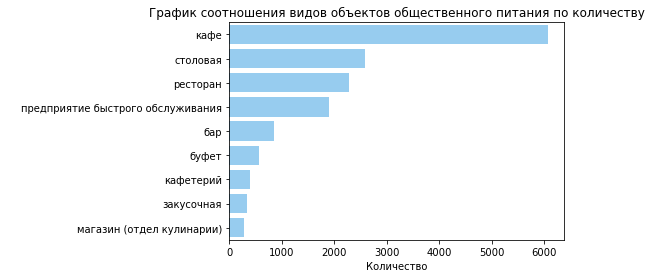

In [17]:
sns.barplot(x='Количество', y='Вид объекта общественного питания', data=data_object_type, color='#89CFFD')
plt.title('График соотношения видов объектов общественного питания по количеству')
plt.ylabel(' ')
plt.show()

**Вывод:**  
Больше всего в Москве кафе. Их чуть больше 6000. На 2 месте группа из трех видов заведений. Это столовая, ресторан и предприятия быстрого обслуживания. Их количество находится в промежутке от 2000 до 2600. На последнем месте у нас магазин (отдел кулинарии). Их всего 273.

2) Исследуем соотношение сетевых и несетевых заведений по количеству.

In [18]:
data['chain'].unique()

array([False,  True])

In [19]:
data_chain = data.groupby('chain')['id'].count().reset_index()
data_chain = data_chain.rename(columns={'chain': 'Сетевой ресторан', 'id': 'Количество ресторанов'})
data_chain

,Сетевой ресторан,Количество ресторанов
0,False,12317
1,True,2964


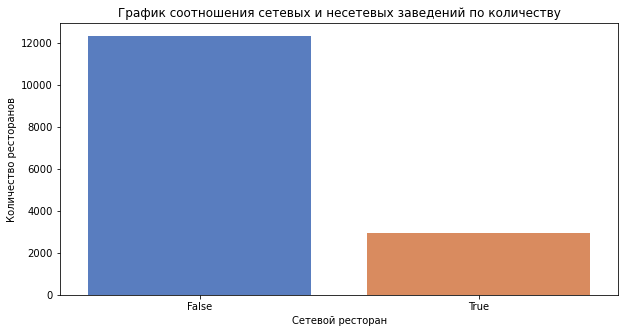

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Сетевой ресторан', y='Количество ресторанов', data=data_chain)
plt.title('График соотношения сетевых и несетевых заведений по количеству')
plt.show()

**Вывод:**  
Несетевых заведений почти в 4 раза больше, чем сетевых.

3) Определим, для какого вида объекта общественного питания характерно сетевое распространение.

Сделаем срез и будем рассматривать только сетевые виды объектов.

In [21]:
data_chain = data.query('chain == True')

In [22]:
data_object_type_chain = data_chain.groupby('object_type')['id'].count().reset_index()
data_object_type_chain = data_object_type_chain.rename(columns={'object_type': 'Вид объекта общественного питания', 'id': 'Количество сетевых объектов'})
data_object_type_chain = data_object_type_chain.sort_values(by='Количество сетевых объектов', ascending=False)
data_object_type_chain

,Вид объекта общественного питания,Количество сетевых объектов
3,кафе,1396
6,предприятие быстрого обслуживания,788
7,ресторан,543
5,магазин (отдел кулинарии),78
2,закусочная,56
4,кафетерий,52
0,бар,37
1,буфет,11
8,столовая,3


Объединим 2 таблицы data_object_type_chain и data_object_type, чтобы посчитать долю сетевых объектов в каждом сегменте.

In [23]:
chain_object = data_object_type.merge(data_object_type_chain, on='Вид объекта общественного питания')
chain_object['Доля сетевых объектов'] = chain_object['Количество сетевых объектов'] / chain_object['Количество'] * 100
chain_object['Доля сетевых объектов'] = chain_object['Доля сетевых объектов'].round(2)
chain_object = chain_object.sort_values(by='Доля сетевых объектов', ascending=False)
chain_object

,Вид объекта общественного питания,Количество,Количество сетевых объектов,Доля сетевых объектов
3,предприятие быстрого обслуживания,1897,788,41.54
8,магазин (отдел кулинарии),273,78,28.57
2,ресторан,2282,543,23.79
0,кафе,6071,1396,22.99
7,закусочная,348,56,16.09
6,кафетерий,395,52,13.16
4,бар,855,37,4.33
5,буфет,576,11,1.91
1,столовая,2584,3,0.12


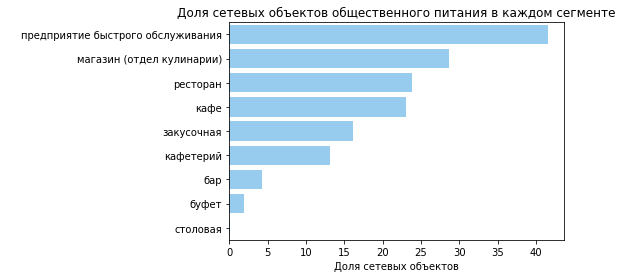

In [24]:
sns.barplot(x='Доля сетевых объектов', y='Вид объекта общественного питания', data=chain_object, color='#89CFFD')
plt.title('Доля сетевых объектов общественного питания в каждом сегменте')
plt.ylabel(' ')
plt.show()

**Вывод:**  
Наибольшая доля сетевых объектов принадлежит предприятиям быстрого обслуживания (41.54). На 2 месте - магазины (отделы кулинарии). У них доля сетевых объектов 28.57. На 3 месте рестораны и кафе примерно с одинаковыми долями сетевого распространения (23.79 и 22.99). Наименьший процент сетевых заведений у столовых. Он составляет всего лишь 0.12. В целом можно сказать, что для всех заведений наиболее характерно несетевое распространение.

4) Определим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [25]:
data_chain

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,True,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,True,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,True,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,True,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,True,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [26]:
object_number = data_chain.groupby('object_name')['number'].agg(['count', 'median']).rename(columns={'count':'count_rest', 'median':'median_number'}).reset_index()
object_number

,object_name,count_rest,median_number
0,beverly hills diner,1,88.0
1,bierloga,1,75.0
2,black & white,1,40.0
3,bocconcino,3,68.0
4,boobo,1,46.0
...,...,...,...
572,ямми микс,1,2.0
573,ян примус,1,300.0
574,японский ресторан «ваби-саби»,1,155.0
575,япоша,2,105.0


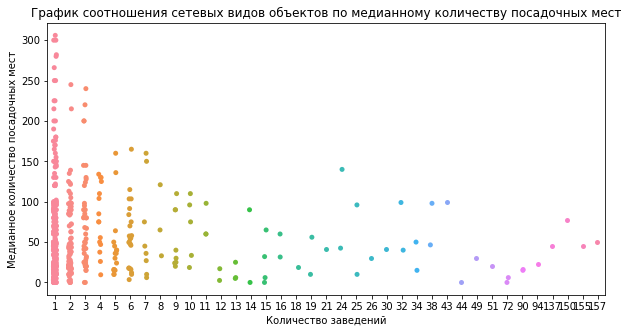

In [27]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='count_rest', y='median_number', data=object_number)
plt.title('График соотношения сетевых видов объектов по медианному количеству посадочных мест')
plt.xlabel('Количество заведений')
plt.ylabel('Медианное количество посадочных мест')
plt.show()

In [28]:
object_number.query('median_number < 50')

,object_name,count_rest,median_number
2,black & white,1,40.0
4,boobo,1,46.0
5,bubbleology,1,6.0
6,burger club,3,20.0
7,coffeeshop,1,0.0
...,...,...,...
565,шоколадница кофемания,1,25.0
566,штирбирлиц,1,48.0
567,штолле,13,25.0
568,югос,1,48.0


**Вывод:**  
Для сетевых заведений характерно большое количество объектов с небольшим числом посадочных мест (<50).

In [29]:
rest_chain_group = data_chain.groupby('object_name')['number'].agg(['count','mean']).rename(columns={'count':'count_rest', 'mean':'mean_number'}).reset_index()
rest_chain_group

,object_name,count_rest,mean_number
0,beverly hills diner,1,88.000000
1,bierloga,1,75.000000
2,black & white,1,40.000000
3,bocconcino,3,66.666667
4,boobo,1,46.000000
...,...,...,...
572,ямми микс,1,2.000000
573,ян примус,1,300.000000
574,японский ресторан «ваби-саби»,1,155.000000
575,япоша,2,105.000000


5) Для каждого вида объекта общественного питания найдем медианное количество посадочных мест.

In [30]:
number_median = data.groupby('object_type')['number'].median().round(2).reset_index()
number_median = number_median.sort_values(by='number', ascending=False)
number_median

,object_type,number
8,столовая,103.0
7,ресторан,80.0
0,бар,35.0
1,буфет,32.0
3,кафе,30.0
4,кафетерий,6.0
6,предприятие быстрого обслуживания,6.0
2,закусочная,0.0
5,магазин (отдел кулинарии),0.0


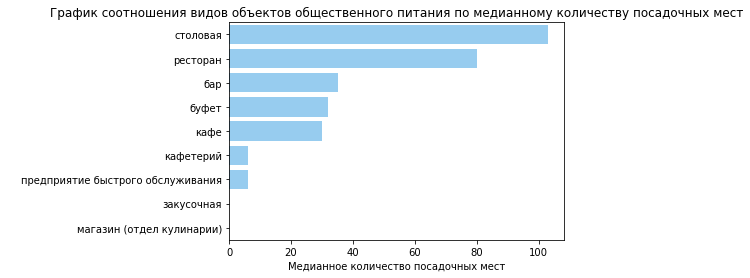

In [31]:
sns.barplot(x='number', y='object_type', data=number_median, color='#89CFFD')
plt.xlabel('Медианное количество посадочных мест')
plt.ylabel(' ')
plt.title('График соотношения видов объектов общественного питания по медианному количеству посадочных мест')
plt.show()

**Вывод:**  
Столовые предоставляют наибольшее количество посадочных мест (103). На 2 месте рестораны (80). В закусочных и магазинах совсем нет посадочных мест.

6) Выделим в отдельный столбец информацию об улице из столбца address.

In [32]:
data

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,True,кафе,"город Москва, поселение Московский, Киевское ш...",36


Сначала выберем те адреса, в которых указана улица:

In [33]:
data['street'] = data['address'][data['address'].str.contains('улица|бульвар|переулок|шоссе|проезд|площадь|проспект|набережная')]
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,"город Москва, улица Егора Абакумова, дом 9"
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,"город Москва, улица Талалихина, дом 2/1, корпус 1"
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,"город Москва, Абельмановская улица, дом 6"
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,"город Москва, Абрамцевская улица, дом 1"
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,"город Москва, Абрамцевская улица, дом 9, корпус 1"


Теперь выберем только те улицы, что находятся в Москве, и создадим для них отдельный столбец `street_name`:

In [34]:
data['street_name'] = data['street'].str.extract('Москва, (.*), дом')
data.head()

,id,object_name,chain,object_type,address,number,street,street_name
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,"город Москва, улица Егора Абакумова, дом 9",улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,"город Москва, улица Талалихина, дом 2/1, корпус 1",улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,"город Москва, Абельмановская улица, дом 6",Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,"город Москва, Абрамцевская улица, дом 1",Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,"город Москва, Абрамцевская улица, дом 9, корпус 1",Абрамцевская улица


In [35]:
data['street_name'].count()

14501

In [36]:
data['address'].count()

15281

7) Построим график топ-10 улиц по количеству объектов общественного питания.

In [37]:
data_street = data.groupby('street_name')['id'].count().reset_index()
data_street = data_street.rename(columns={'street_name': 'Название улицы', 'id': 'Количество объектов'})
data_street = data_street.sort_values(by='Количество объектов', ascending=False).head(10)
data_street

,Название улицы,Количество объектов
1445,проспект Мира,203
949,Профсоюзная улица,181
644,Ленинградский проспект,169
935,Пресненская набережная,167
370,Варшавское шоссе,155
647,Ленинский проспект,147
1442,проспект Вернадского,127
635,Кутузовский проспект,114
562,Каширское шоссе,103
1199,Ходынский бульвар,102


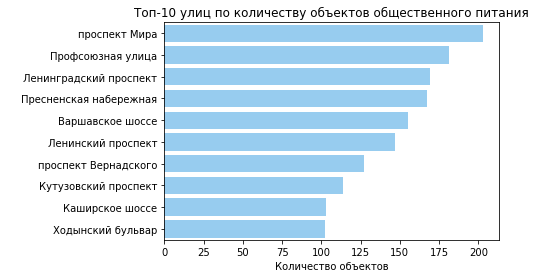

In [38]:
sns.barplot(x='Количество объектов', y='Название улицы', data=data_street, color='#89CFFD')
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.ylabel(' ')
plt.show()

Лидирует проспект Мира, на нем находится 203 объекта общественного питания. На 2 месте улица Профсоюзная, на ней находится 181 объект общественного питания. Далее на 3 месте Ленинградский проспект (169 объектов).

8) Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся улицы из топ-10.

In [39]:
from io import BytesIO
import requests
spreadsheet_id = '1uXtNMc9yqjob5tWMREfg8CIEePW0mWI3P8qyt-Z11T8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19552,00363535,Домино'с Пицца,2381690180,да,Домино'с Пицца,кафе,Юго-Западный административный округ,район Тёплый Стан,"Российская Федерация, город Москва, внутригоро...",NaN,17,нет,37.5111530000000070,55.6363787228666450,"{""coordinates"":[37.511153,55.6363787228666],""t...",NaN
19553,00363333,Coffeeshop Company,2381690187,да,Coffeeshop Company,кафе,Центральный административный округ,Красносельский район,"город Москва, Мясницкая улица, дом 11",NaN,42,нет,37.6326579999999990,55.7617077590700060,"{""coordinates"":[37.632658,55.76170775907],""typ...",NaN
19554,00363641,Хлебница пекарня,2381690199,да,Хлебница пекарня,кафетерий,Юго-Западный административный округ,район Тёплый Стан,"Российская Федерация, город Москва, внутригоро...",NaN,6,нет,37.5151020000000060,55.6303137211249140,"{""coordinates"":[37.515102,55.6303137211249],""t...",NaN
19555,00363805,Милти,2381690282,да,Милти,предприятие быстрого обслуживания,Северо-Восточный административный округ,район Марьина Роща,"Российская Федерация, город Москва, внутригоро...",NaN,1,нет,37.6025440000000230,55.7922847679640980,"{""coordinates"":[37.602544,55.7922847679641],""t...",NaN


Посмотрим, в каких районах находятся наши улицы.

In [40]:
data_new = data[['id', 'address', 'street_name', 'number']]

df_new = df[['District', 'Address']]
df_new.columns = df_new.columns.str.lower()

data_distr = data_new.merge(df_new, on='address', how='inner')
data_distr = data_distr[['id','street_name', 'district', 'number']].drop_duplicates()
data_distr = data_distr[['id','street_name', 'district', 'number']]
data_distr

data_dis = data_distr[['street_name', 'district']]
top10_street = data_distr.groupby(['street_name']).agg({'id':'count'}).sort_values(by='id', ascending=False).head(10).reset_index()
top10_street
top_10_dis = top10_street.merge(data_dis, how='left', on='street_name')
top_10_dis
top_10_dis.pivot_table(index=['street_name', 'district']).sort_values(by='id', ascending=False)

id
street_name            district                        
проспект Мира          район Свиблово               175
                       район Ростокино              175
                       Останкинский район           175
                       Мещанский район              175
                       Алексеевский район           175
Профсоюзная улица      район Ясенево                143
                       район Черёмушки              143
                       район Тёплый Стан            143
                       район Коньково               143
                       Обручевский район            143
Кутузовский проспект   район Фили-Давыдково         142
                       поселение Краснопахорское    142
                       район Дорогомилово           142
Ленинградский проспект Хорошёвский район            139
                       район Аэропорт               139
                       район Беговой                139
                       район Сокол                  139
Пресненская набережная Пресненский район            135
Ленинский проспект     район Тропарёво-Никулино     117
                       район Якиманка               117
                       район Тёплый Стан            117
                       район Проспект Вернадского   117
                       Обручевский район            117
                       Ломоносовский район          117
                       Донской район                117
                       Гагаринский район            117
Варшавское шоссе       Нагорный район               116
                       район Нагатино-Садовники     116
                       район Чертаново Северное     116
                       район Чертаново Центральное  116
                       район Чертаново Южное        116
                       Донской район                116
                       район Южное Бутово           116
проспект Вернадского   поселение Вороновское        102
                       район Проспект Вернадского   102
                       район Раменки                102
                       район Тропарёво-Никулино     102
                       Ломоносовский район          102
Ходынский бульвар      Хорошёвский район             99
Кировоградская улица   район Чертаново Северное      95
                       район Чертаново Центральное   95
                       район Чертаново Южное         95

**Вывод:**  
Видим, что каждая улица находится в нескольких районах города.

9) Найдем число улиц с одним объектом общественного питания и определим, в каком районе они находятся.

In [41]:
one_street = data_distr.pivot_table(index=['street_name', 'district'], values='id', aggfunc='count').reset_index().query('id == 1')
one_street

,street_name,district,id
1,1-й Балтийский переулок,район Аэропорт,1
2,1-й Басманный переулок,Красносельский район,1
3,1-й Ботанический проезд,район Свиблово,1
7,1-й Голутвинский переулок,район Якиманка,1
10,1-й Котельнический переулок,Таганский район,1
...,...,...,...
1786,улица Шкулёва,район Текстильщики,1
1788,улица Шумилова,район Кузьминки,1
1790,улица Шухова,Донской район,1
1793,улица Щорса,район Солнцево,1


In [42]:
count_street = one_street.groupby('district')['street_name'].count().reset_index()
count_street = count_street.rename(columns={'street_name': 'street_count'})
count_street = count_street.sort_values(by='street_count', ascending=False)
count_street

,district,street_count
4,Басманный район,26
113,район Хамовники,25
24,Таганский район,24
21,Пресненский район,20
25,Тверской район,19
...,...,...
104,район Силино,1
103,район Северное Тушино,1
101,район Северное Измайлово,1
53,район Восточный,1


**Вывод:**  
Получили 125 районов, в которых находится 603 улицы с одним заведением.

10) Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

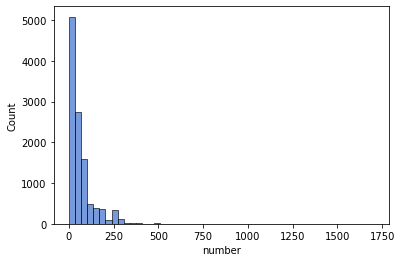

In [43]:
sns.histplot(data_distr['number'], bins=50)
plt.show()

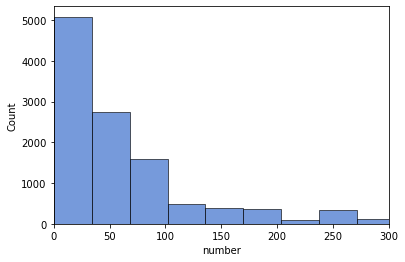

In [44]:
sns.histplot(data_distr['number'], bins=50)
plt.xlim(0, 300)
plt.show()

**Вывод:**  
Большинство заведений без посадочных мест.

## Общий вывод
* Больше всего в Москве кафе. Их чуть больше 6000. На 2 месте группа из трех видов заведений. Это столовая, ресторан и предприятия быстрого обслуживания. Их количество находится в промежутке от 2000 до 2600.
* Несетевых заведений почти в 4 раза больше, чем сетевых.
* Наибольшая доля сетевых объектов принадлежит предприятиям быстрого обслуживания (41.54). Наименьший процент сетевых заведений у столовых. Он составляет всего лишь 0.12. В целом можно сказать, что для всех заведений наиболее характерно несетевое распространение.
* Для сетевых заведений характерно большое количество объектов с небольшим числом посадочных мест (<50).
* Столовые предоставляют наибольшее количество посадочных мест (103). На 2 месте рестораны (80). В закусочных и магазинах совсем нет посадочных мест.
* Большинство заведений находится в центре Москвы.
* По количеству заведений лидирует проспект Мира, на нем находится 203 объекта общественного питания. На 2 месте улица Профсоюзная, на ней находится 181 объект общественного питания. Далее на 3 месте Ленинградский проспект (169 объектов).
* Также у нас получилось 125 районов, в которых находится 603 улицы с одним заведением.
* Большинство заведений не имеют посадочных мест.

## Рекомендации

Рекомендую открыть кафе в Москве с небольшим числом посадочных мест (не больше 30). Стоит обратить внимание на центральные районы, в которых много улиц с 1 заведением. Например, это может быть Тверской или Басманный район. Из-за малого количества заведений конкуренция будет небольшой, но так как эти районы расположены в центре, то и проходимость будет высокой. 

## Презентация

Презентация: https://drive.google.com/file/d/1Q7m9M2sBGzd3n935FmpJj_vUlk7eq6se/view?usp=sharing